# Marketing strategy based on opinion propagation model in a social network
We are using a Facebook social network from: source_URL

## Load the graph using nx

In [17]:
import networkx as nx

def graph_generation(filename):
    
    G = nx.read_edgelist(filename,nodetype=int)
    for i in list(G.nodes):
        G.add_node(i,alpha=G.degree[i])
    print(nx.info(G))
    return(G)
    
G=graph_generation("graph.txt")
G.nodes[0]



Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


{'alpha': 347}

In [18]:
#return (list of users ,list of listeners, list of evaluation)
import numpy as np
import random
from math import *
def initialisation(G,pctg_user,p_user,p_listener):
    users=random.sample(list(G.nodes),k=ceil(pctg_user*(len(list(G.nodes)))))
    users=sorted(users)
    listeners=[i for i in list(G.nodes) if i not in users]
    G_eval=np.zeros([len(G.nodes)])
    for i in users:
        G_eval[i]=np.random.choice([1,-1],p=[p_user,1-p_user])
    for j in listeners:
        G_eval[j]=np.random.choice([1,-1],p=[p_listener,1-p_listener])
    return(users,listeners,G_eval)
#(users,listeners,G_eval)=initialisation(G,0.5,0.5,0.5)
#G_eval

In [47]:
import matplotlib.pyplot as plt

def iter_opinion(G, G_eval, listeners, max_interation=10):
    G_eval_evolution = np.zeros([max_interation+1,len(G_eval)])
    np.copyto(G_eval_evolution[0],G_eval);
    for t in range(1,max_interation+1):
        is_changed = False;
        degree = np.array([j for (i,j) in (list)(G.degree)])
        for listner in listeners:
            weight = 0
            avg = 0
            neighbors = np.array((list)(G[listner]))
            neighbors_eval = np.sign(np.sum(G_eval[neighbors] * degree[neighbors]))
            if (G_eval[listner] != neighbors_eval):
                is_changed = True;
                G_eval[listner] =  neighbors_eval
        if (not is_changed):
            for j in range(t,max_interation+1):
                np.copyto(G_eval_evolution[j],G_eval)
            break;
        np.copyto(G_eval_evolution[t],G_eval);
    return G_eval_evolution

## Find the best p<sub>user</sub> for the first strategy

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


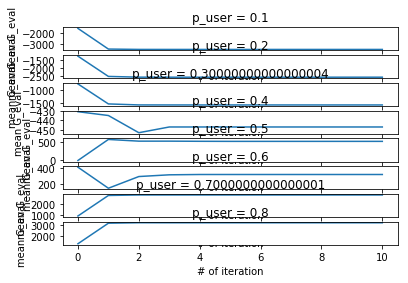

In [50]:
def find_best_p_user():
    G=graph_generation("graph.txt")
    p_user_range=np.arange(0.1,0.9,0.1)
    for p_user in p_user_range:
        (users,listeners,G_eval)=initialisation(G,0.5,p_user,0.5)
        G_eval_mean=np.sum(iter_opinion(G, G_eval,listeners),axis=1)
        plt.subplot(8, 1, int(p_user*10))
        plt.plot(G_eval_mean)
        plt.title("p_user = {}".format(p_user))
        plt.ylabel('mean G_eval')
        plt.xlabel('# of iteration')
    plt.show()
    
find_best_p_user()   

In [21]:
def strategy2_ini(G,V_threshold,G_eval):
    num_V=0
    for i in list(G.nodes):
        if G.nodes[i]['alpha']>V_threshold:
            G_eval[i]=1
            num_V+=1
    return (G_eval,num_V)

## Compare the two strategies with given paramters [one experiment]

## Compare the two strategies with given paramters [Expectation]
Strategy 1: increase the product quality(croyance) from 0.5 to 0.6   
It seems like 10% of improvement means a lot!

Strategy 2: influence the people with more than 300 friends (=5 people).

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


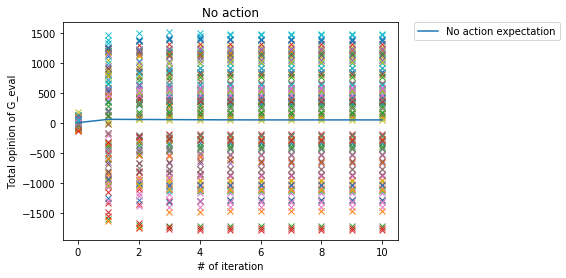

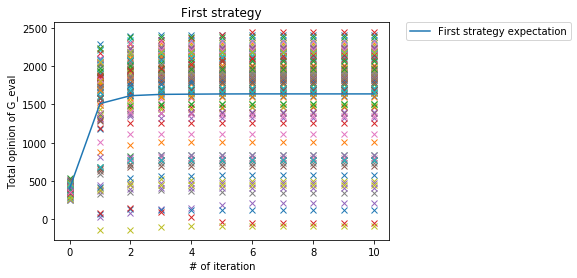

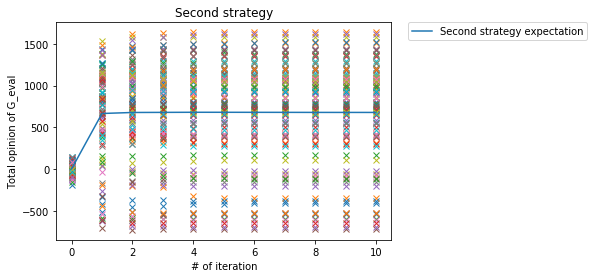

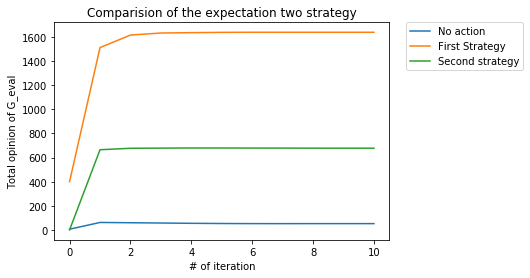

In [49]:
G=graph_generation("graph.txt")

# set the number of experiments (to calculate the expectation)
nb_exp = 100
max_interation = 10+1
G_eval_mean_series_0 = np.zeros((nb_exp, max_interation))
G_eval_mean_series_1 = np.zeros((nb_exp, max_interation))
G_eval_mean_series_2 = np.zeros((nb_exp, max_interation))
for i in range(nb_exp):
    # No action
    (users,listeners,G_eval)=initialisation(G,0.5,0.5,0.5)
    G_eval_mean=np.sum(iter_opinion(G, G_eval, listeners),axis=1)
    G_eval_mean_series_0[i,:] = G_eval_mean[:]
#     plt.plot(G_eval_mean, ".")

    # Stragegy 1 p_user = 0.6
    (users,listeners,G_eval)=initialisation(G,0.5,0.6,0.5)
    G_eval_mean=np.sum(iter_opinion(G, G_eval, listeners),axis=1)
    G_eval_mean_series_1[i,:] = G_eval_mean[:]
#     plt.plot(G_eval_mean, "o")
    

    # Strategy 2 Big_V = degree >300
    (users,listeners,G_eval)=initialisation(G,0.5,0.5,0.5)
    (G_eval,num_V)=strategy2_ini(G,300,G_eval)
    G_eval_mean=np.sum(iter_opinion(G, G_eval, listeners),axis=1)
    G_eval_mean_series_2[i,:] = G_eval_mean[:]
#     plt.plot(G_eval_mean, "x")

# plt.show()

G_eval_mean_exp_0 = np.mean(G_eval_mean_series_0, axis=0)
[plt.plot(x, "x") for x in G_eval_mean_series_0]
plt.plot(G_eval_mean_exp_0, label = "No action expectation")
plt.title("No action")
plt.ylabel('Total opinion of G_eval')
plt.xlabel('# of iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

G_eval_mean_exp_1 = np.mean(G_eval_mean_series_1, axis=0)
[plt.plot(x, "x") for x in G_eval_mean_series_1]
plt.plot(G_eval_mean_exp_1, label = "First strategy expectation")
plt.title("First strategy")
plt.ylabel('Total opinion of G_eval')
plt.xlabel('# of iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

G_eval_mean_exp_2 = np.mean(G_eval_mean_series_2, axis=0)
[plt.plot(x, "x") for x in G_eval_mean_series_2]
plt.plot(G_eval_mean_exp_2, label = "Second strategy expectation")
plt.title("Second strategy")
plt.ylabel('Total opinion of G_eval')
plt.xlabel('# of iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(G_eval_mean_exp_0, label="No action")
plt.plot(G_eval_mean_exp_1, label="First Strategy")
plt.plot(G_eval_mean_exp_2, label = "Second strategy")
plt.title("Comparision of the expectation two strategy")
plt.ylabel('Total opinion of G_eval')
plt.xlabel('# of iteration')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()   

## Some study on degree distribution: how do decide who is BigV

In [34]:
degrees = np.array([j for (i,j) in G.degree])
sorted(degrees, reverse=True)

[1045,
 792,
 755,
 547,
 347,
 294,
 291,
 254,
 245,
 235,
 234,
 234,
 231,
 229,
 226,
 224,
 223,
 222,
 221,
 220,
 217,
 211,
 210,
 209,
 207,
 207,
 207,
 205,
 205,
 205,
 205,
 204,
 203,
 203,
 202,
 202,
 201,
 201,
 201,
 201,
 200,
 199,
 199,
 198,
 198,
 198,
 198,
 198,
 197,
 197,
 197,
 196,
 196,
 195,
 195,
 195,
 195,
 194,
 193,
 193,
 193,
 192,
 192,
 191,
 191,
 191,
 191,
 190,
 190,
 190,
 190,
 190,
 190,
 189,
 189,
 189,
 188,
 188,
 188,
 188,
 187,
 187,
 187,
 187,
 186,
 186,
 186,
 186,
 185,
 185,
 185,
 185,
 184,
 184,
 184,
 183,
 183,
 183,
 182,
 182,
 182,
 182,
 182,
 181,
 181,
 180,
 180,
 179,
 179,
 179,
 178,
 178,
 178,
 178,
 178,
 177,
 177,
 177,
 177,
 176,
 176,
 176,
 176,
 175,
 175,
 174,
 174,
 173,
 173,
 173,
 173,
 173,
 173,
 172,
 172,
 172,
 171,
 171,
 171,
 170,
 170,
 170,
 169,
 169,
 169,
 168,
 168,
 168,
 168,
 168,
 167,
 167,
 166,
 166,
 166,
 166,
 165,
 165,
 165,
 165,
 165,
 164,
 164,
 164,
 164,
 163,
 16

In [37]:
sum(degrees>250)

8

(array([1.813e+03, 8.830e+02, 4.410e+02, 2.810e+02, 1.720e+02, 1.400e+02,
        9.000e+01, 7.400e+01, 6.900e+01, 5.300e+01, 1.000e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.18800e+01, 4.27600e+01, 6.36400e+01, 8.45200e+01,
        1.05400e+02, 1.26280e+02, 1.47160e+02, 1.68040e+02, 1.88920e+02,
        2.09800e+02, 2.30680e+02, 2.51560e+02, 2.72440e+02, 2.93320e+02,
        3.14200e+02, 3.35080e+02, 3.55960e+02, 3.76840e+02, 3.97720e+02,
        4.18600e+02, 4.39480e+02, 4.60360e+02, 4.81240e+02, 5.02120e+02,
        5.2

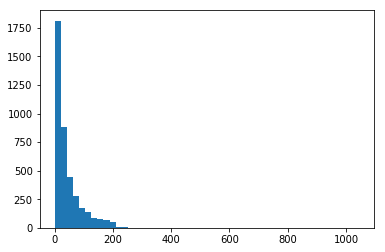

In [46]:
plt.hist(degrees,bins=50)


## Evaluation

In [51]:
G_eval_mean_exp_0

array([ 7.36, 63.24, 60.94, 58.61, 56.15, 54.48, 53.63, 53.47, 53.61,
       53.61, 53.61])

In [52]:
G_eval_mean_exp_1

array([ 401.38, 1510.99, 1614.37, 1631.45, 1634.36, 1636.84, 1637.79,
       1637.68, 1637.6 , 1637.58, 1637.58])

In [53]:
G_eval_mean_exp_2

array([  1.5 , 665.16, 677.23, 678.5 , 679.68, 679.5 , 679.08, 678.7 ,
       678.16, 677.92, 677.8 ])

## test unit

In [24]:
G.nodes[1]['alpha']

17

In [25]:
#print("# of nodes",G.number_of_nodes())
#print("# of edges",G.number_of_edges())
#G.adj['0']
#G.degree['0']
#G.nodes
for i in list(G.nodes):
    G.nodes[i]['alpha']=G.degree[i]
    #alpha=influence factor
    G.add_node(i,alpha=G.degree[i])

#percentage of user
import random
from math import *

pctg_user=0.5
users=random.sample(list(G.nodes),k=ceil(pctg_user*(len(list(G.nodes)))))
users=sorted(users)
listeners=[i for i in list(G.nodes) if i not in users]
#print(users)
#print("listeners",listeners)
#print(len(list(G.nodes)))
#p_a taux of positive for user, p_b listener
p_user=0.5
p_listener=0.5
G_eval=[0]*len(list(G.nodes))
#print(len(G_eval))
import numpy as np
for i in users:
    #print(i)
    G_eval[i]=np.random.choice([1,-1],p=[p_user,1-p_user])
    #print(G_eval[i])
    
print("j")
for j in listeners:
    #print(j)
    G_eval[j]=np.random.choice([1,-1],p=[p_listener,1-p_listener])
    #print(G_eval[j])
#print(G_eval)

j
